# Student Performance Prediction and Early Intervention System
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## Project Overview

This project aims to predict student performance based on demographic, engagement, and behavioral features. Using this predictive model, we will identify at-risk students and provide actionable insights for educators and parents, enabling early interventions to improve academic outcomes.

---

## Dataset Description

The dataset contains the following columns:

- **gender**: Student's gender  
- **NationalITy**: Student's nationality  
- **PlaceofBirth**: Student's place of birth  
- **StageID**: Educational stage (e.g., Grade level)  
- **GradeID**: Specific grade within the stage  
- **SectionID**: Class section  
- **Topic**: Subject topic  
- **Semester**: Semester of study  
- **Relation**: Relationship of parent/guardian  
- **raisedhands**: Number of times the student raised hands in class  
- **VisITedResources**: Number of resources accessed by the student  
- **AnnouncementsView**: Number of times the student viewed announcements  
- **Discussion**: Number of times the student participated in discussion forums  
- **ParentAnsweringSurvey**: Whether the parent answered school surveys  
- **ParentschoolSatisfaction**: Level of parent satisfaction with school  
- **StudentAbsenceDays**: Number of absence days  
- **Class**: Target variable indicating student performance (e.g., Low, Medium, High)

---

## Project Methodology

The project follows a **systematic and industry-standard workflow**:

1. **Problem Understanding**
   - Define objectives, constraints, and business value of predicting student performance.

2. **Exploratory Data Analysis (EDA)**
   - Understand feature distributions, correlations, and data quality.
   - Identify patterns linking engagement and demographics to performance.

3. **Data Preprocessing**
   - Handle missing values and outliers.
   - Encode categorical features and normalize numerical features.
   - Engineer new features (e.g., engagement score, parental support score).

4. **Model Selection and Training**
   - Start with interpretable models (Logistic Regression, Decision Tree).
   - Progress to high-performance models (Random Forest, XGBoost, LightGBM).
   - Handle class imbalance with oversampling or class weights.

5. **Model Evaluation**
   - Use stratified train-validation-test splits.
   - Evaluate performance using Accuracy, F1-score, Precision, Recall, and Confusion Matrix.
   - Apply cross-validation for robustness.

6. **Model Explainability**
   - Use feature importance, SHAP values, and Partial Dependence Plots.
   - Ensure transparency and regulatory compliance.

7. **Deployment**
   - Build a pipeline for preprocessing, model inference, and explainability.
   - Develop a dashboard (Streamlit/Flask) for educators to monitor at-risk students.

8. **Innovative Solution: Early Intervention**
   - Predict at-risk students before final assessments.
   - Trigger automated alerts for teachers and parents.
   - Provide actionable suggestions (e.g., tutoring, additional resources).

9. **Monitoring and Maintenance**
   - Track model performance over time.
   - Update model with new student data periodically.

---

## Expected Outcomes

- Accurate prediction of student performance (`Class`).
- Clear, actionable insights for teachers and parents.
- Early identification of at-risk students to reduce failure rates.
- A fully operational, explainable system ready for deployment in educational institutions.

---

This notebook will implement the above methodology step by step, including data preprocessing, model building, evaluation, explainability, and deployment-ready outputs.


In [2]:
# Import Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Explainability
import shap
from sklearn.inspection import permutation_importance

# Misc
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [5]:
#  Load and Inspect Dataset

# Load the dataset (replace 'student_data.csv' with your actual file path)
df = pd.read_csv("Students' Academic Performance Dataset.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset shape
print(f"\nDataset shape: {df.shape}")

# Check column data types and non-null counts
print("\nDataset info:")
df.info()

# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
display(df.describe())

# Summary statistics for categorical features
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()}")

First 5 rows of the dataset:


gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M


Dataset shape: (480, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null 

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


Unique values in categorical columns:
gender: 2
NationalITy: 14
PlaceofBirth: 14
StageID: 3
GradeID: 10
SectionID: 3
Topic: 12
Semester: 2
Relation: 2
ParentAnsweringSurvey: 2
ParentschoolSatisfaction: 2
StudentAbsenceDays: 2
Class: 3


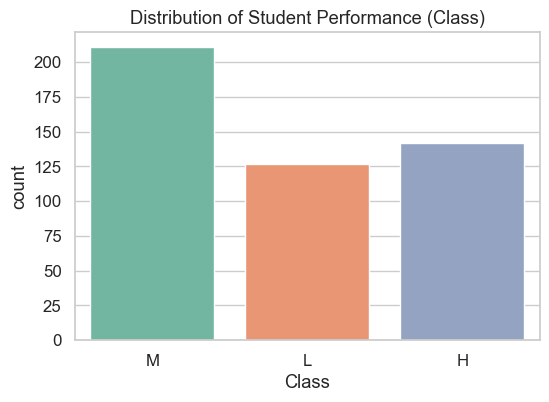

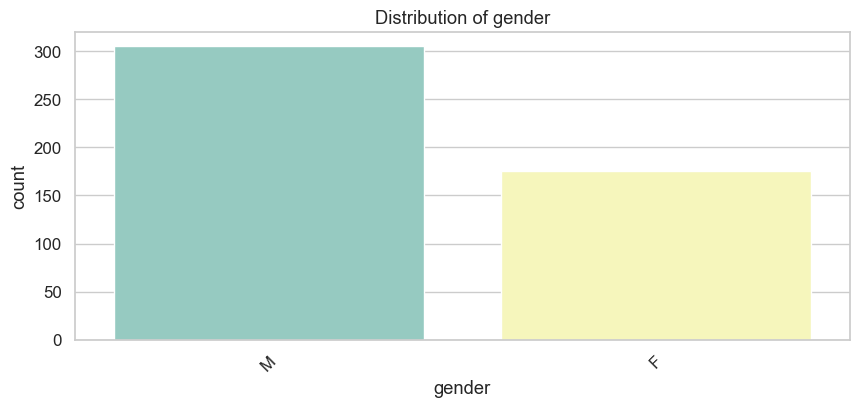

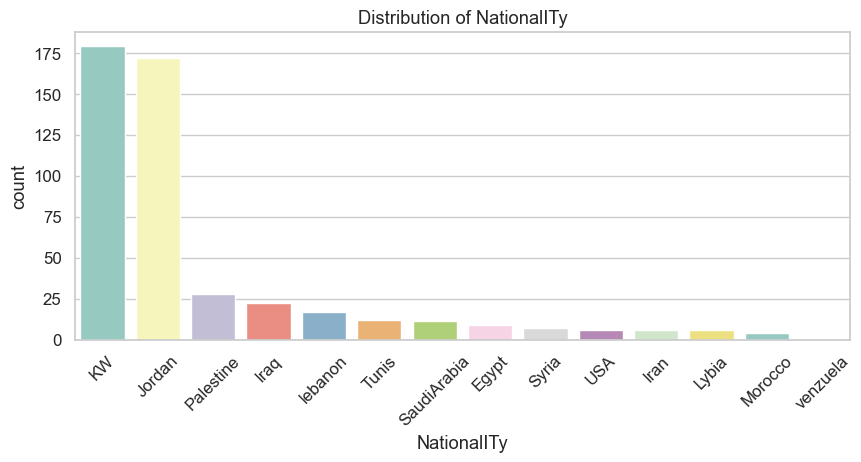

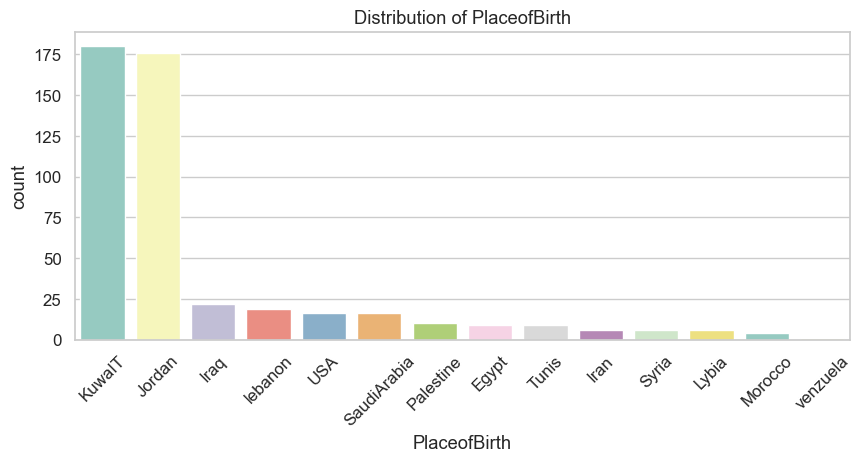

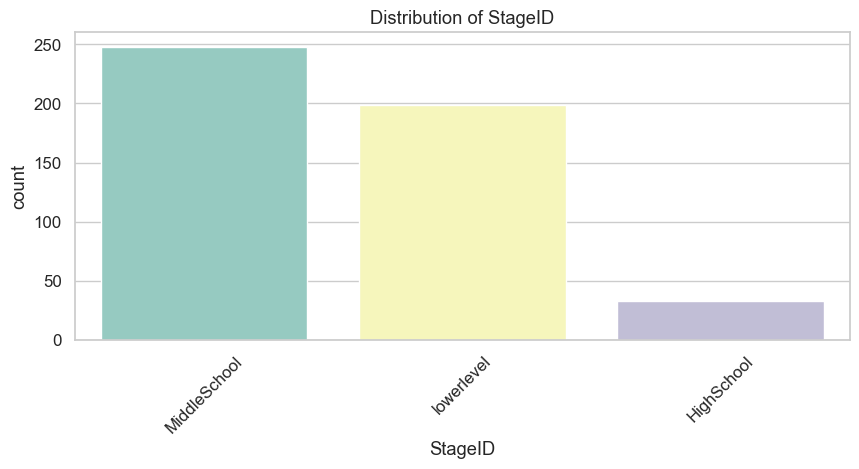

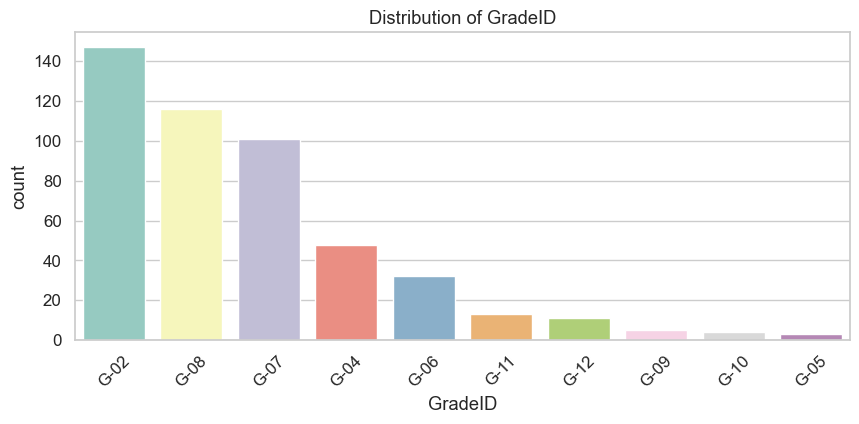

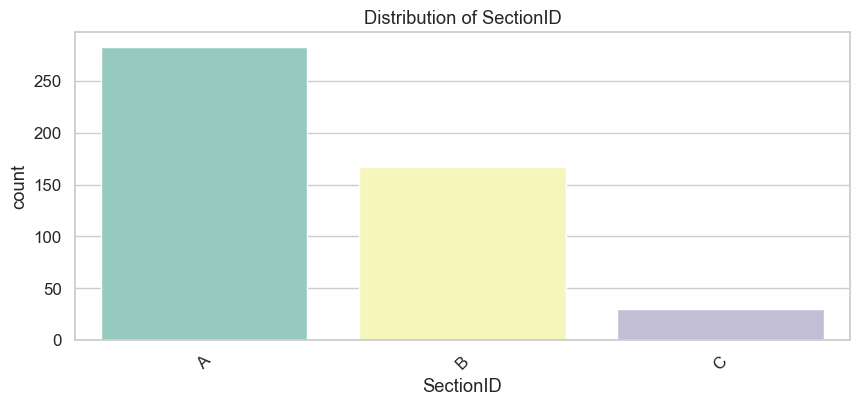

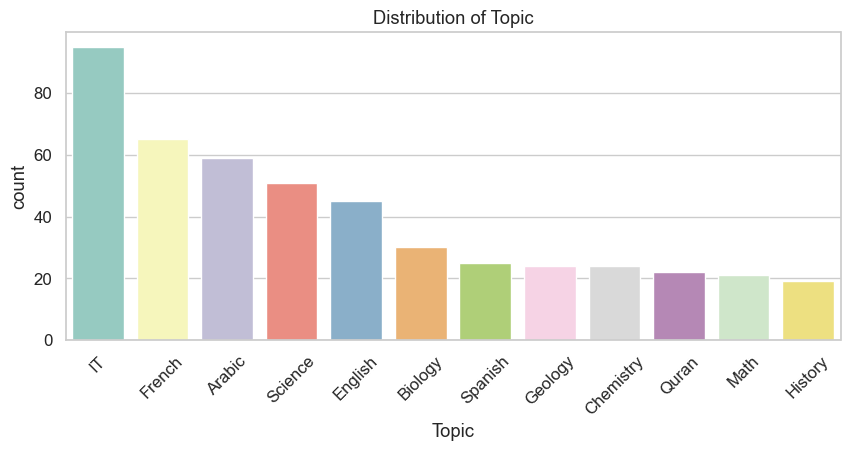

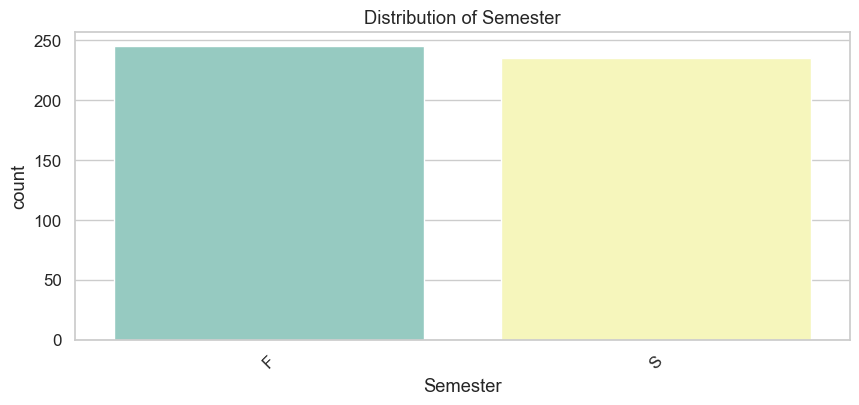

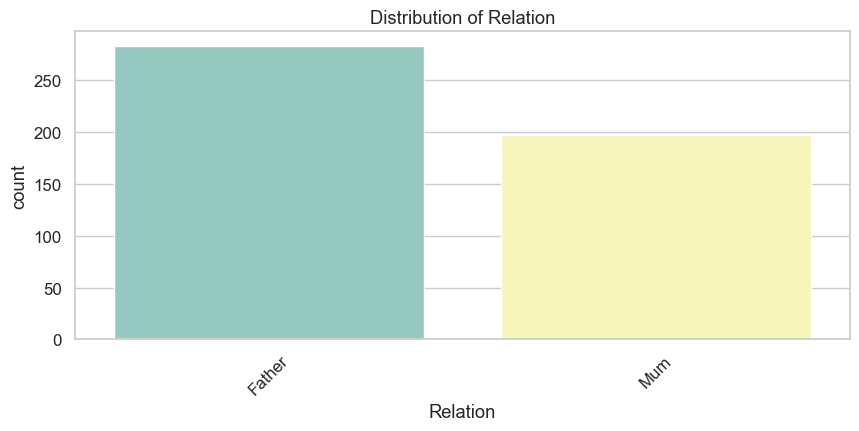

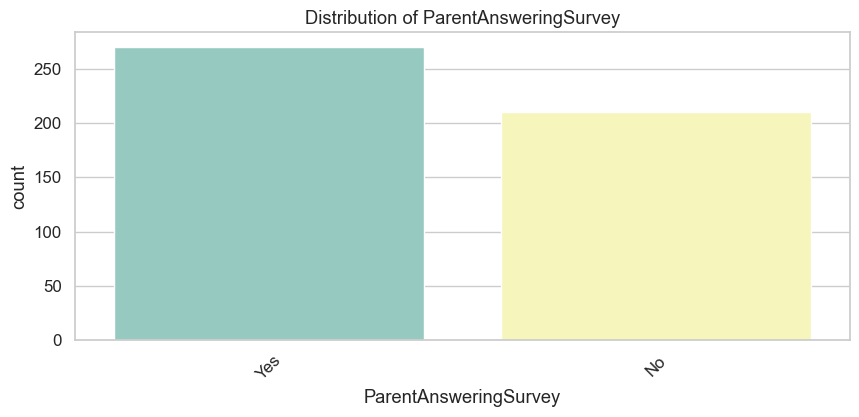

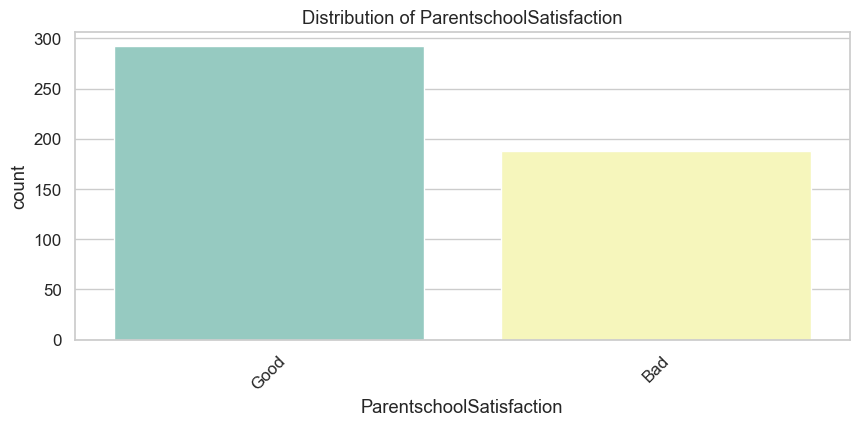

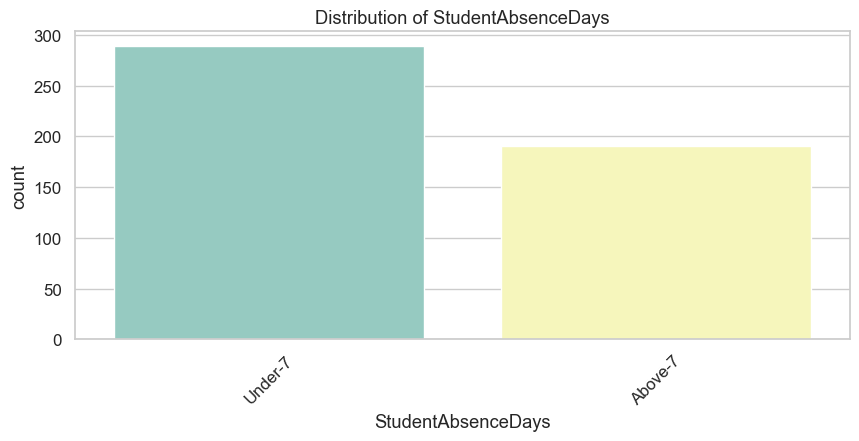

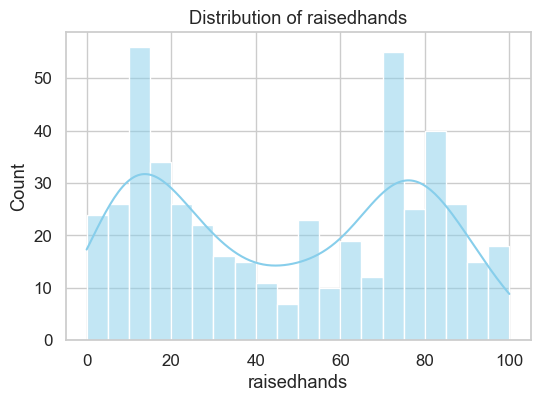

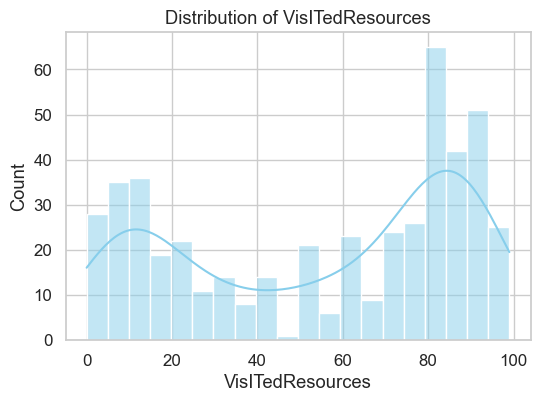

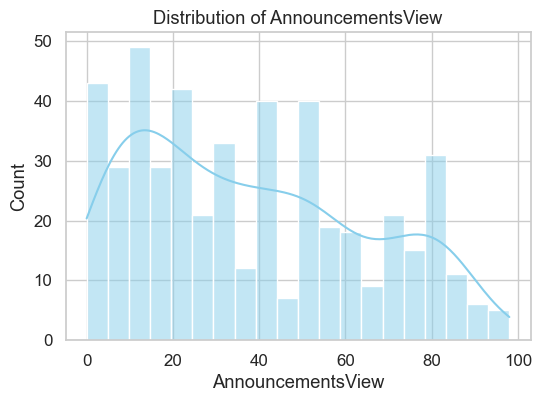

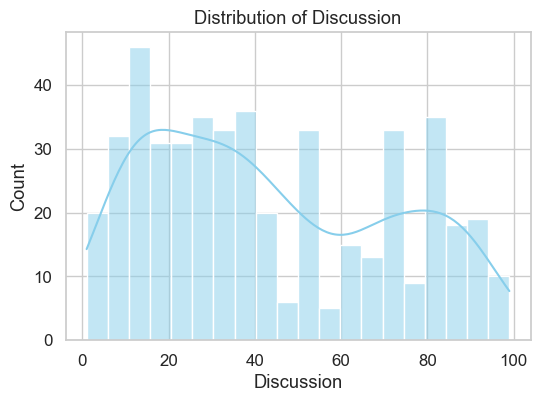

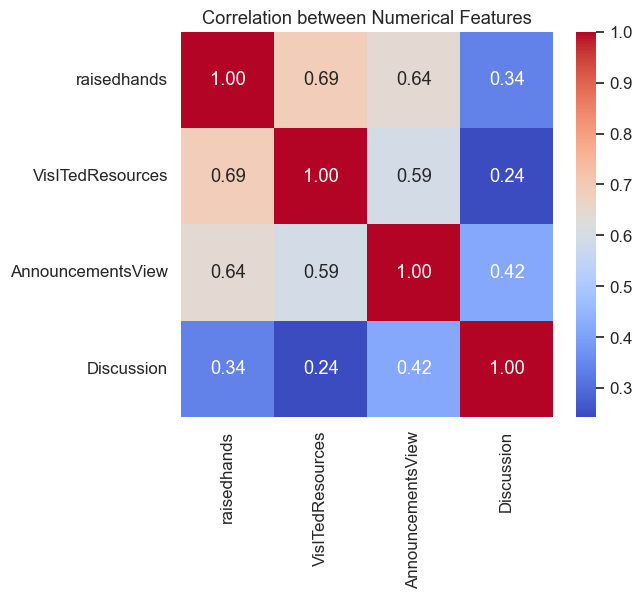

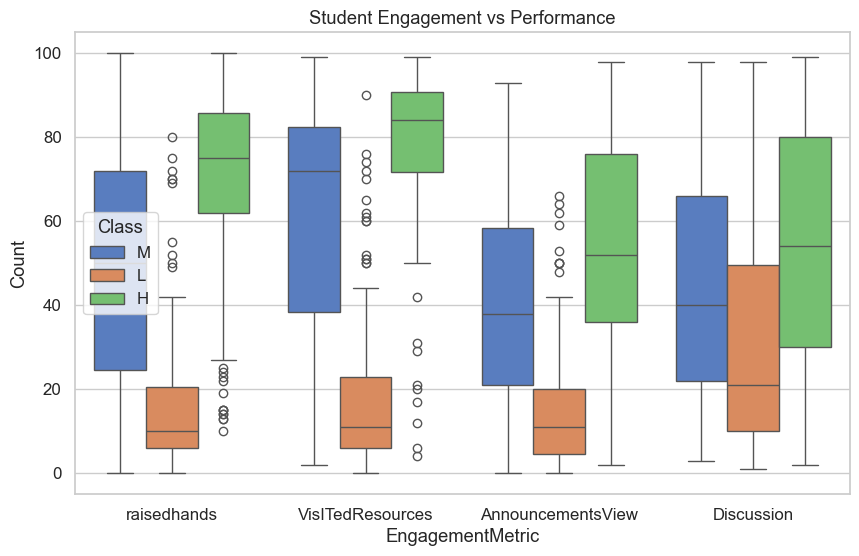

In [6]:
# 3️ Exploratory Data Analysis (EDA)
# Import visualization settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ---- 1. Target Variable Distribution ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title("Distribution of Student Performance (Class)")
plt.show()

# ---- 2. Categorical Features Distribution ----
categorical_cols = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 
                    'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 
                    'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set3')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ---- 3. Numerical Features Distribution ----
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

# ---- 4. Correlation Heatmap for Numerical Features ----
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Numerical Features")
plt.show()

# ---- 5. Relationship between Engagement and Class ----
engagement_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
df_engagement = df[engagement_cols + ['Class']].melt(id_vars='Class', var_name='EngagementMetric', value_name='Count')

plt.figure(figsize=(10,6))
sns.boxplot(data=df_engagement, x='EngagementMetric', y='Count', hue='Class')
plt.title("Student Engagement vs Performance")
plt.show()


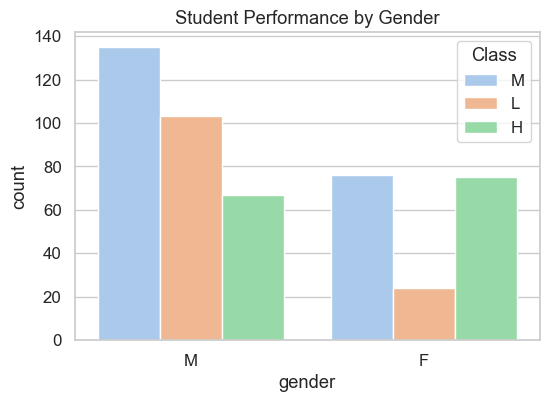

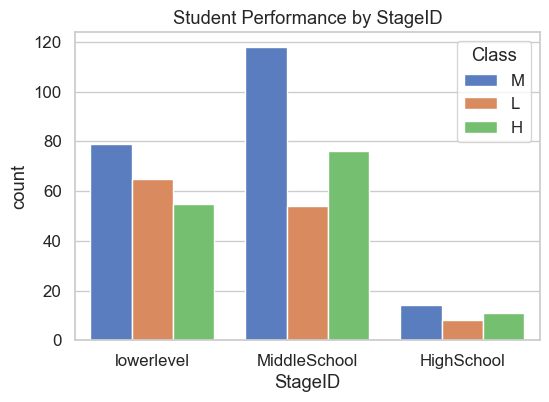

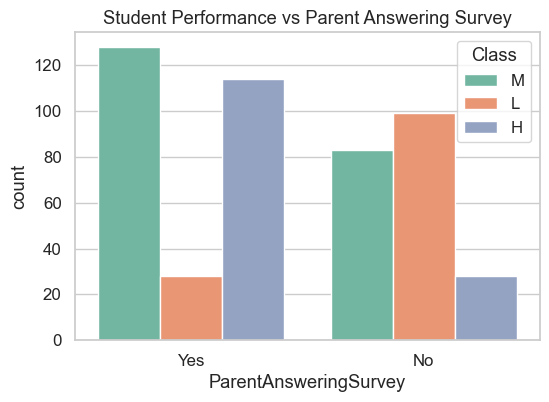

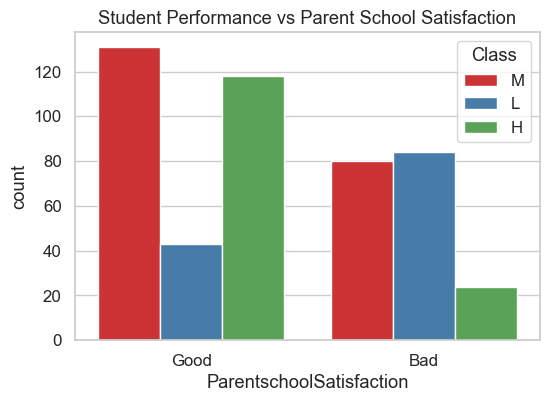

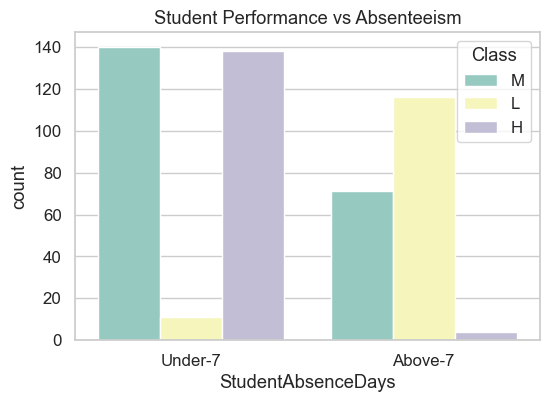

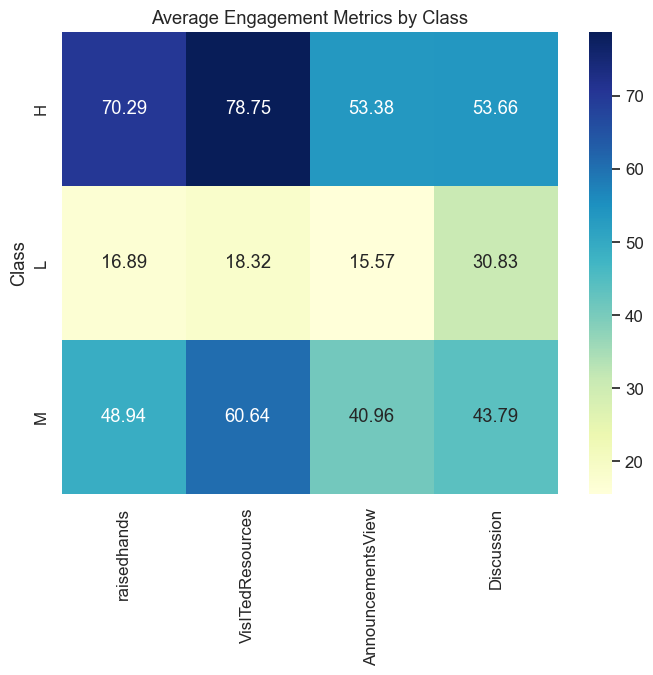

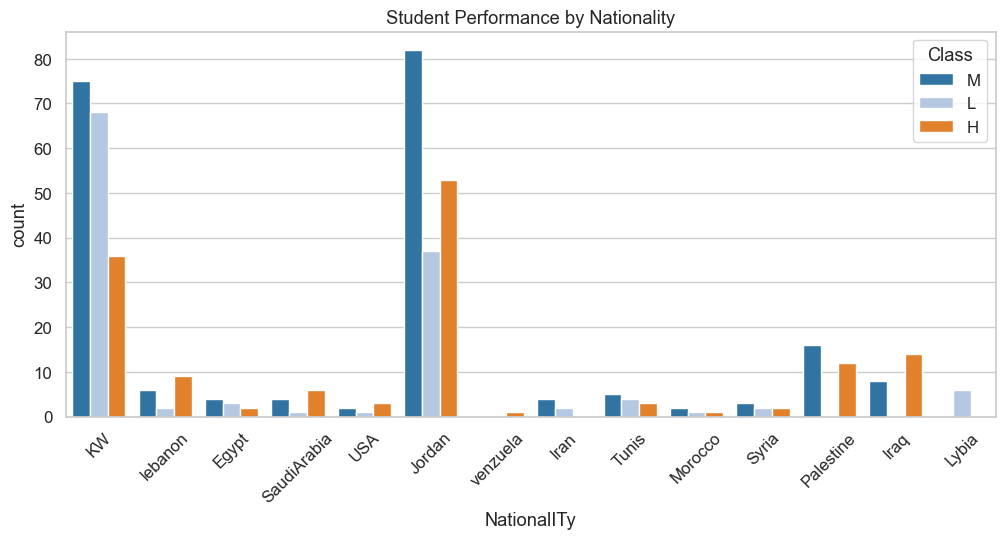

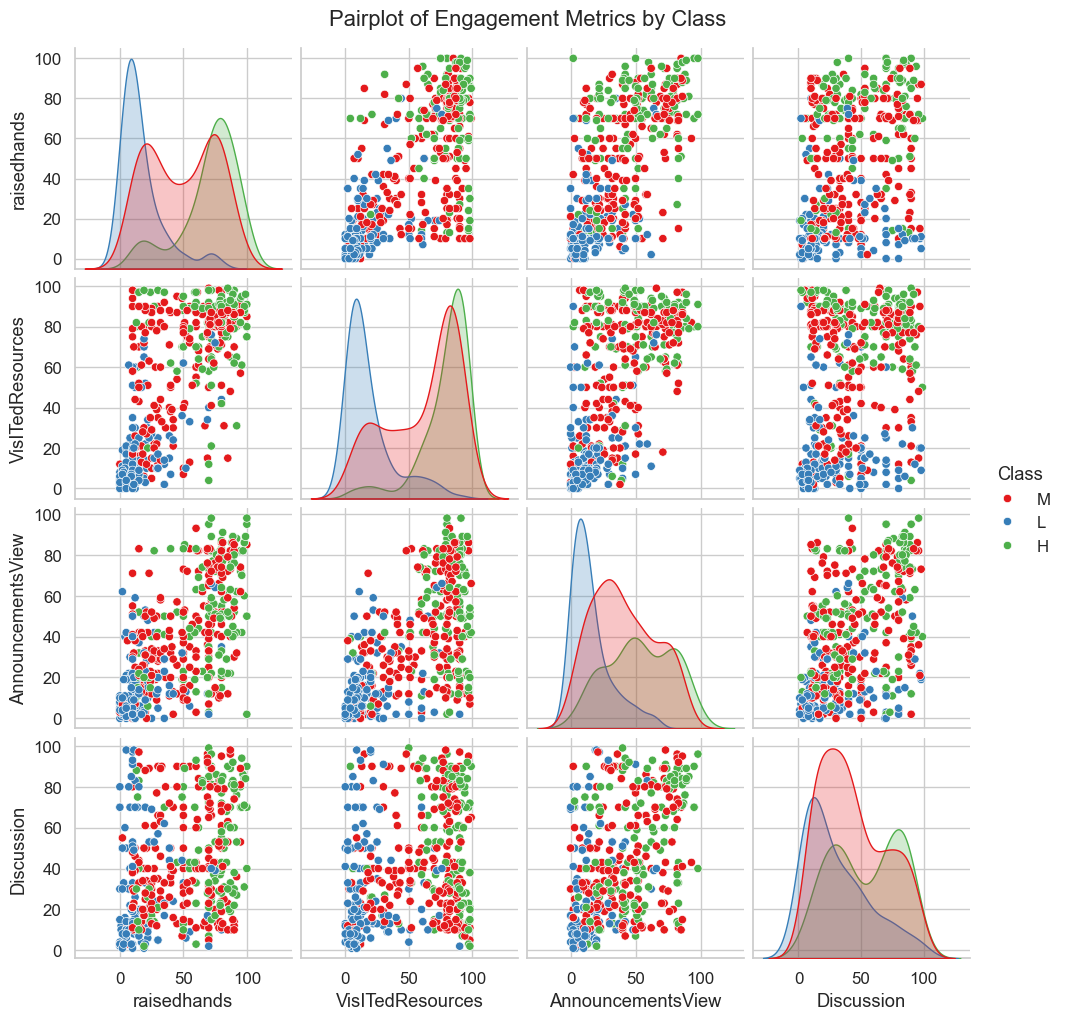

In [7]:
# 3️ Additional EDA: Feature Insights and Relationships

# ---- 1. Class vs Gender ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Class', palette='pastel')
plt.title("Student Performance by Gender")
plt.show()

# ---- 2. Class vs StageID (Educational Stage) ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='StageID', hue='Class', palette='muted')
plt.title("Student Performance by StageID")
plt.show()

# ---- 3. Class vs Parent Participation ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ParentAnsweringSurvey', hue='Class', palette='Set2')
plt.title("Student Performance vs Parent Answering Survey")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ParentschoolSatisfaction', hue='Class', palette='Set1')
plt.title("Student Performance vs Parent School Satisfaction")
plt.show()

# ---- 4. Class vs Student Absence Days ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='StudentAbsenceDays', hue='Class', palette='Set3')
plt.title("Student Performance vs Absenteeism")
plt.show()

# ---- 5. Engagement Heatmap by Class ----
engagement_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
plt.figure(figsize=(8,6))
sns.heatmap(df.groupby('Class')[engagement_cols].mean(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Engagement Metrics by Class")
plt.show()

# ---- 6. Class vs Nationality ----
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='NationalITy', hue='Class', palette='tab20')
plt.title("Student Performance by Nationality")
plt.xticks(rotation=45)
plt.show()

# ---- 7. Pairplot of Engagement Metrics colored by Class ----
sns.pairplot(df, vars=engagement_cols, hue='Class', height=2.5, palette='Set1')
plt.suptitle("Pairplot of Engagement Metrics by Class", y=1.02)
plt.show()


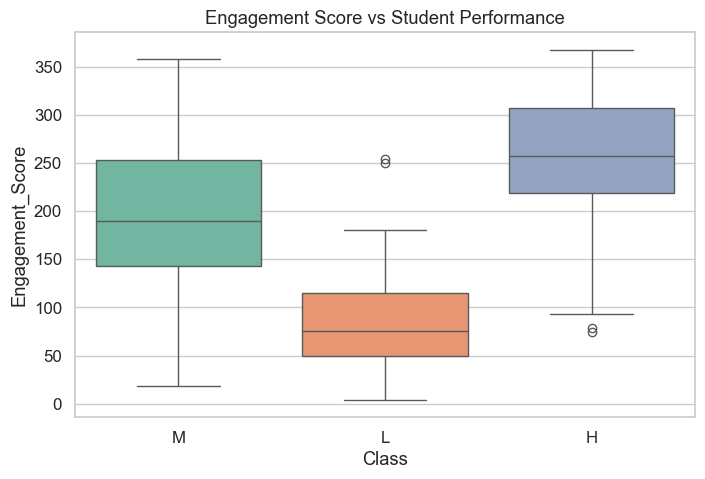

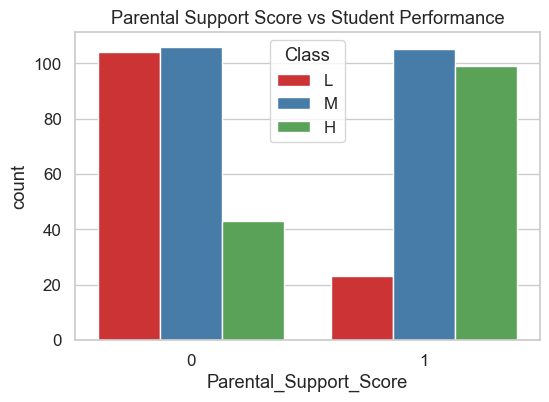

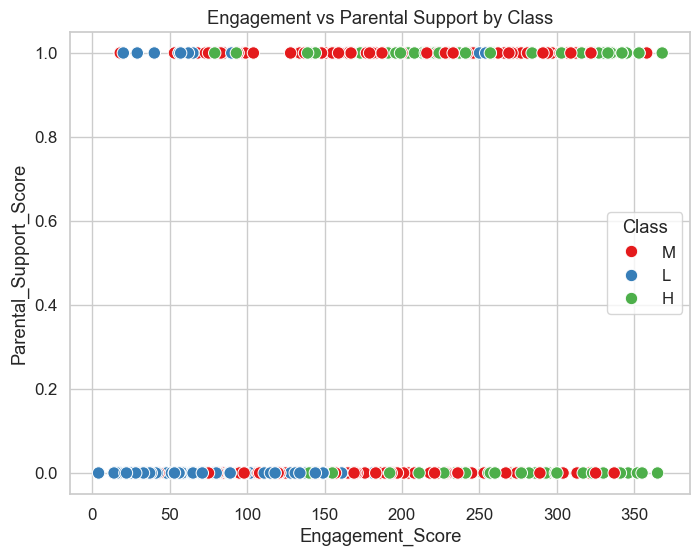

In [8]:
# 3️ Feature Engineering for EDA: Engagement & Parental Support

# ---- 1. Encode Parent Columns Numerically for Score ----
df_encoded = df.copy()
df_encoded['ParentAnsweringSurvey_Num'] = df_encoded['ParentAnsweringSurvey'].map({'Yes':1, 'No':0})
df_encoded['ParentschoolSatisfaction_Num'] = df_encoded['ParentschoolSatisfaction'].map({'Good':1, 'Bad':0})

# ---- 2. Create Engagement Score ----
df_encoded['Engagement_Score'] = df_encoded['raisedhands'] + df_encoded['VisITedResources'] + \
                                df_encoded['AnnouncementsView'] + df_encoded['Discussion']

# ---- 3. Create Parental Support Score ----
df_encoded['Parental_Support_Score'] = df_encoded['ParentAnsweringSurvey_Num'] * df_encoded['ParentschoolSatisfaction_Num']

# ---- 4. Visualize Engagement Score by Class ----
plt.figure(figsize=(8,5))
sns.boxplot(data=df_encoded, x='Class', y='Engagement_Score', palette='Set2')
plt.title("Engagement Score vs Student Performance")
plt.show()

# ---- 5. Visualize Parental Support Score by Class ----
plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded, x='Parental_Support_Score', hue='Class', palette='Set1')
plt.title("Parental Support Score vs Student Performance")
plt.show()

# ---- 6. Scatter Engagement vs Parental Support colored by Class ----
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_encoded, x='Engagement_Score', y='Parental_Support_Score', hue='Class', palette='Set1', s=80)
plt.title("Engagement vs Parental Support by Class")
plt.show()


In [11]:
# Check for NaNs in the target
print("Missing values in Class column after encoding:")
print(df_preprocessed['Class'].isna().sum())

# Optionally, check which rows caused NaNs
nan_rows = df_preprocessed[df_preprocessed['Class'].isna()]
display(nan_rows)


Missing values in Class column after encoding:
480


raisedhands  VisITedResources  AnnouncementsView  Discussion  \
0             15                16                  2          20   
1             20                20                  3          25   
2             10                 7                  0          30   
3             30                25                  5          35   
4             40                50                 12          50   
..           ...               ...                ...         ...   
475            5                 4                  5           8   
476           50                77                 14          28   
477           55                74                 25          29   
478           30                17                 14          57   
479           35                14                 23          62   

     ParentAnsweringSurvey  ParentschoolSatisfaction  StudentAbsenceDays  \
0                        1                         1                   0   
1                        1                         1                   0   
2                        0                         0                   1   
3                        0                         0                   1   
4                        0                         0                   1   
..                     ...                       ...                 ...   
475                      0                         0                   1   
476                      0                         0                   0   
477                      0                         0                   0   
478                      0                         0                   1   
479                      0                         0                   1   

     Class  NationalITy_Iran  NationalITy_Iraq  ...  Topic_IT  Topic_Math  \
0      NaN             False             False  ...      True       False   
1      NaN             False             False  ...      True       False   
2      NaN             False             False  ...      True       False   
3      NaN             False             False  ...      True       False   
4      NaN             False             False  ...      True       False   
..     ...               ...               ...  ...       ...         ...   
475    NaN             False             False  ...     False       False   
476    NaN             False             False  ...     False       False   
477    NaN             False             False  ...     False       False   
478    NaN             False             False  ...     False       False   
479    NaN             False             False  ...     False       False   

     Topic_Quran  Topic_Science  Topic_Spanish  Semester_S  Relation_Mum  \
0          False          False          False       False         False   
1          False          False          False       False         False   
2          False          False          False       False         False   
3          False          False          False       False         False   
4          False          False          False       False         False   
..           ...            ...            ...         ...           ...   
475        False          False          False        True         False   
476        False          False          False       False         False   
477        False          False          False        True         False   
478        False          False          False       False         False   
479        False          False          False        True         False   

     gender_M  Engagement_Score  Parental_Support_Score  
0        True                53                       1  
1        True                68                       1  
2        True                47                       0  
3        True                95                       0  
4        True               152                       0  
..        ...               ...                     ...  
475     False      

In [12]:
# Check unique values including spaces
print(df_preprocessed['Class'].unique())


[nan]


In [14]:
# Check exact column names
print(df.columns)


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [15]:
# Inspect unique values and sample rows of Class
print("Unique values in 'Class':")
print(df['Class'].unique())

# Show the first 10 rows of Class column to see formatting issues
print("\nSample of Class values:")
print(df['Class'].head(10))


Unique values in 'Class':
['M' 'L' 'H']

Sample of Class values:
0    M
1    M
2    L
3    L
4    M
5    M
6    L
7    M
8    M
9    M
Name: Class, dtype: object


In [16]:
# Map Class letters to numeric
class_mapping = {'L': 0, 'M': 1, 'H': 2}
df['Class'] = df['Class'].map(class_mapping)

# Verify mapping
print("Unique values in Class after mapping:", df['Class'].unique())
print("Number of NaNs in Class after mapping:", df['Class'].isna().sum())


Unique values in Class after mapping: [1 0 2]
Number of NaNs in Class after mapping: 0


In [17]:
# 4️ Data Preprocessing (Corrected)
# Make a fresh copy of the original DataFrame
df_preprocessed = df.copy()

# ---- 1. Encode categorical features (exclude Class) ----
onehot_cols = ['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 
               'SectionID', 'Topic', 'Semester', 'Relation', 'gender']
df_preprocessed = pd.get_dummies(df_preprocessed, columns=onehot_cols, drop_first=True)

# ---- 2. Encode Parent and Absence Columns ----
df_preprocessed['ParentAnsweringSurvey'] = df_preprocessed['ParentAnsweringSurvey'].map({'Yes':1, 'No':0})
df_preprocessed['ParentschoolSatisfaction'] = df_preprocessed['ParentschoolSatisfaction'].map({'Good':1, 'Bad':0})
df_preprocessed['StudentAbsenceDays'] = df_preprocessed['StudentAbsenceDays'].map({'Under-7':0, 'Above-7':1})

# ---- 3. Create Engineered Features ----
df_preprocessed['Engagement_Score'] = df_preprocessed['raisedhands'] + df_preprocessed['VisITedResources'] + \
                                     df_preprocessed['AnnouncementsView'] + df_preprocessed['Discussion']
df_preprocessed['Parental_Support_Score'] = df_preprocessed['ParentAnsweringSurvey'] * df_preprocessed['ParentschoolSatisfaction']

# ---- 4. Feature-target split ----
X = df_preprocessed.drop('Class', axis=1)
y = df_preprocessed['Class']

# ---- 5. Train-Test Split ----
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- 6. Feature Scaling for numerical features ----
from sklearn.preprocessing import StandardScaler
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 
                  'Engagement_Score', 'Parental_Support_Score']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Preprocessing complete. Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Preprocessing complete. Shapes:
X_train: (384, 62), X_test: (96, 62)


In [18]:
# 5️ Baseline Models: Training & Evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary to store models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


--- Decision Tree ---
Accuracy: 0.7708
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.76      0.74      0.75        42
           2       0.75      0.86      0.80        28

    accuracy                           0.77        96
   macro avg       0.78      0.78      0.77        96
weighted avg       0.77      0.77      0.77        96

Confusion Matrix:
[[19  6  1]
 [ 4 31  7]
 [ 0  4 24]]


--- Random Forest ---
Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.78      0.86      0.82        42
           2       0.96      0.82      0.88        28

    accuracy                           0.83        96
   macro avg       0.85      0.83      0.84        96
weighted avg       0.84      0.83      0.83        96

Confusion Matrix:
[[21  5  0]
 [ 5 36  1]
 [ 0  5 23]]




In [22]:
# 9️ Advanced Model: XGBoost Classifier

from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(
    n_estimators=300, 
    max_depth=6, 
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=3,
    random_state=42,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.76      0.83      0.80        42
           2       0.81      0.75      0.78        28

    accuracy                           0.81        96
   macro avg       0.83      0.81      0.82        96
weighted avg       0.82      0.81      0.81        96

Confusion Matrix:
 [[22  4  0]
 [ 2 35  5]
 [ 0  7 21]]


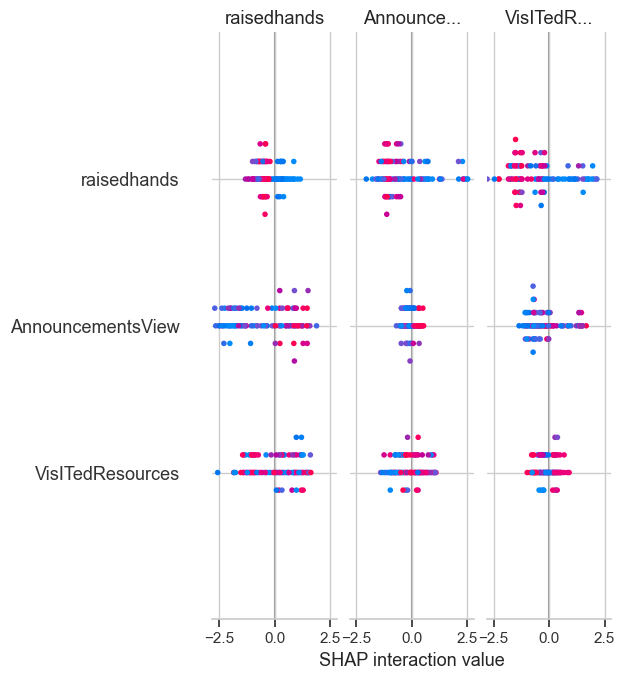

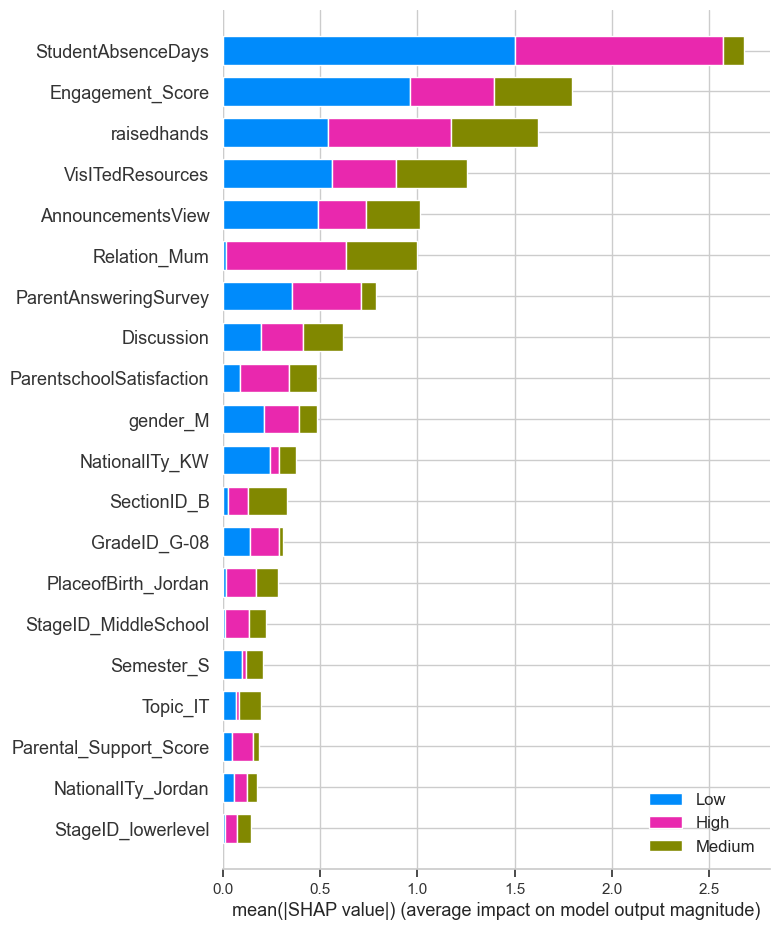

In [28]:
#  SHAP Interpretability for Multiclass XGBoost

import shap

# ---- 1. Create TreeExplainer ----
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# ---- 2. Summary Plot ----
# Shows impact of all features on model output
shap.summary_plot(shap_values, X_test, class_names=['Low','Medium','High'])

# ---- 3. Feature Importance Plot (bar) ----
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=['Low','Medium','High'])


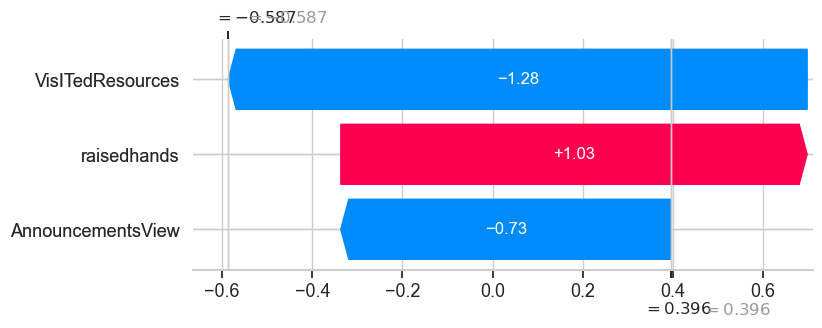

In [29]:
#  SHAP Waterfall Plots for Individual Students (Multiclass Safe)

import shap
import matplotlib.pyplot as plt

# ---- 1. Create TreeExplainer ----
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# ---- 2. Waterfall Plot for a Single Student ----
# Example: explain first student for class "High" (index 2)
student_idx = 0
class_idx = 2  # 0=Low, 1=Medium, 2=High

# Convert X_test row to DataFrame to match SHAP values
student_features = X_test.iloc[[student_idx]]

# Create SHAP object for the class
shap_class_values = shap_values[class_idx][student_idx, :]

# Display the waterfall plot
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[class_idx],
    shap_class_values,
    feature_names=X_test.columns,
    max_display=10
)
plt.show()


In [30]:
#  Predict on Full Dataset & Segment Students by Risk

import pandas as pd

# Use the trained XGBoost model to predict the classes for all students
# Assuming X_full contains all feature columns (after preprocessing)
y_pred_full = xgb_model.predict(X)

# Add predictions to the original dataframe
df_predictions = df.copy()
df_predictions['Predicted_Class'] = y_pred_full

# Map numeric predictions back to original labels if needed
class_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
df_predictions['Predicted_Class_Label'] = df_predictions['Predicted_Class'].map(class_mapping)

# Display the first few predictions
print("Sample predictions on full dataset:")
display(df_predictions[['gender','GradeID','raisedhands','VisITedResources','StudentAbsenceDays','Class','Predicted_Class_Label']])


Sample predictions on full dataset:


gender GradeID  raisedhands  VisITedResources StudentAbsenceDays  Class  \
0        M    G-04           15                16            Under-7      1   
1        M    G-04           20                20            Under-7      1   
2        M    G-04           10                 7            Above-7      0   
3        M    G-04           30                25            Above-7      0   
4        M    G-04           40                50            Above-7      1   
..     ...     ...          ...               ...                ...    ...   
475      F    G-08            5                 4            Above-7      0   
476      F    G-08           50                77            Under-7      1   
477      F    G-08           55                74            Under-7      1   
478      F    G-08           30                17            Above-7      0   
479      F    G-08           35                14            Above-7      0   

    Predicted_Class_Label  
0                  Medium  
1                  Medium  
2                  Medium  
3                  Medium  
4                  Medium  
..                    ...  
475                Medium  
476                  High  
477                  High  
478                Medium  
479                Medium  

[480 rows x 7 columns]

In [31]:
#  Segment Students by Risk
# Create a simple risk category based on predicted class
# Low -> At-risk, Medium -> Moderate-risk, High -> Safe
risk_mapping = {'Low': 'At-Risk', 'Medium': 'Moderate-Risk', 'High': 'Safe'}
df_predictions['Risk_Category'] = df_predictions['Predicted_Class_Label'].map(risk_mapping)

# Display the distribution of students across risk categories
risk_counts = df_predictions['Risk_Category'].value_counts()
print("Number of students per risk category:")
print(risk_counts)

# Display a sample of segmented students
display(df_predictions[['gender','GradeID','raisedhands','VisITedResources','StudentAbsenceDays','Class','Predicted_Class_Label','Risk_Category']].head(10))


Number of students per risk category:
Risk_Category
Safe             265
Moderate-Risk    215
Name: count, dtype: int64


gender GradeID  raisedhands  VisITedResources StudentAbsenceDays  Class  \
0      M    G-04           15                16            Under-7      1   
1      M    G-04           20                20            Under-7      1   
2      M    G-04           10                 7            Above-7      0   
3      M    G-04           30                25            Above-7      0   
4      M    G-04           40                50            Above-7      1   
5      F    G-04           42                30            Above-7      1   
6      M    G-07           35                12            Above-7      0   
7      M    G-07           50                10            Under-7      1   
8      F    G-07           12                21            Under-7      1   
9      F    G-07           70                80            Under-7      1   

  Predicted_Class_Label  Risk_Category  
0                Medium  Moderate-Risk  
1                Medium  Moderate-Risk  
2                Medium  Moderate-Risk  
3                Medium  Moderate-Risk  
4                Medium  Moderate-Risk  
5                Medium  Moderate-Risk  
6                Medium  Moderate-Risk  
7                  High           Safe  
8                  High           Safe  
9                  High           Safe


--- SHAP Summary for Moderate-Risk Students ---


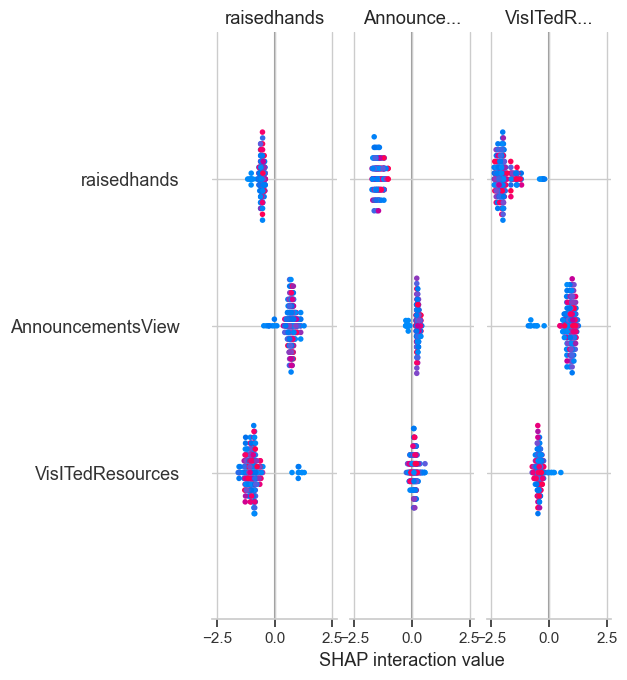

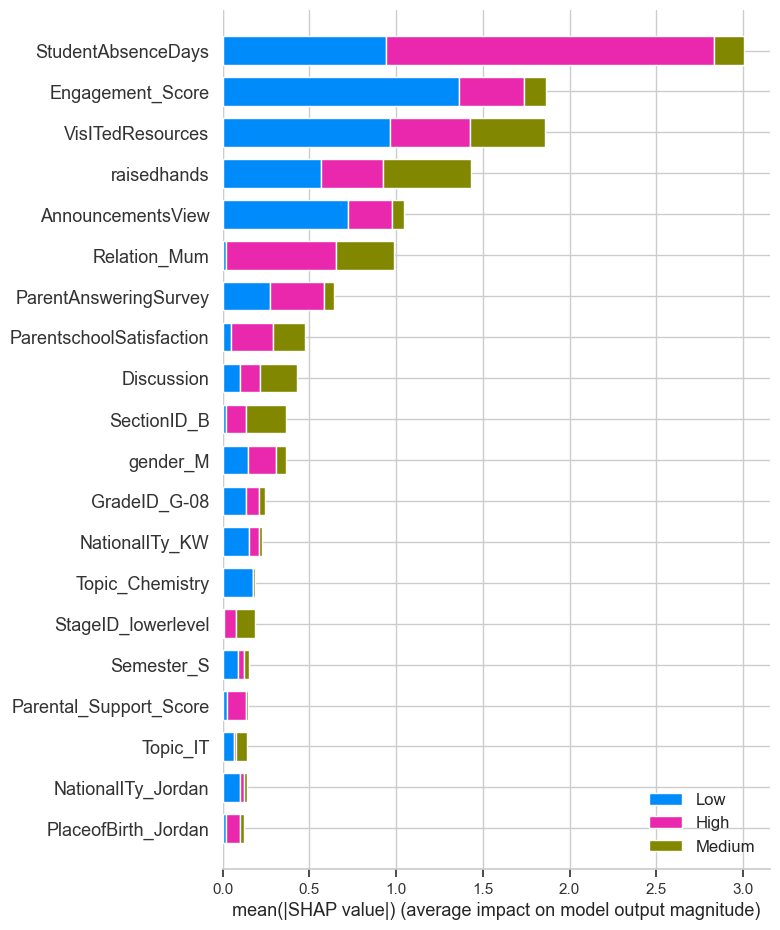


--- SHAP Summary for Safe Students ---


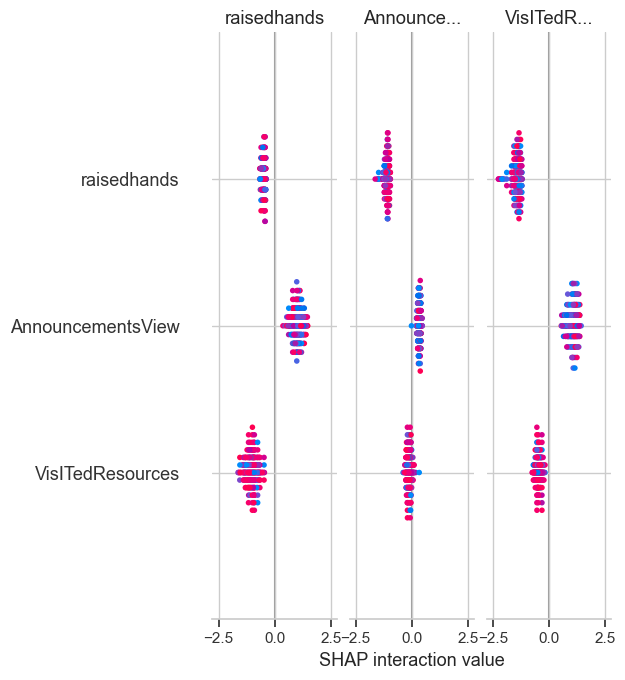

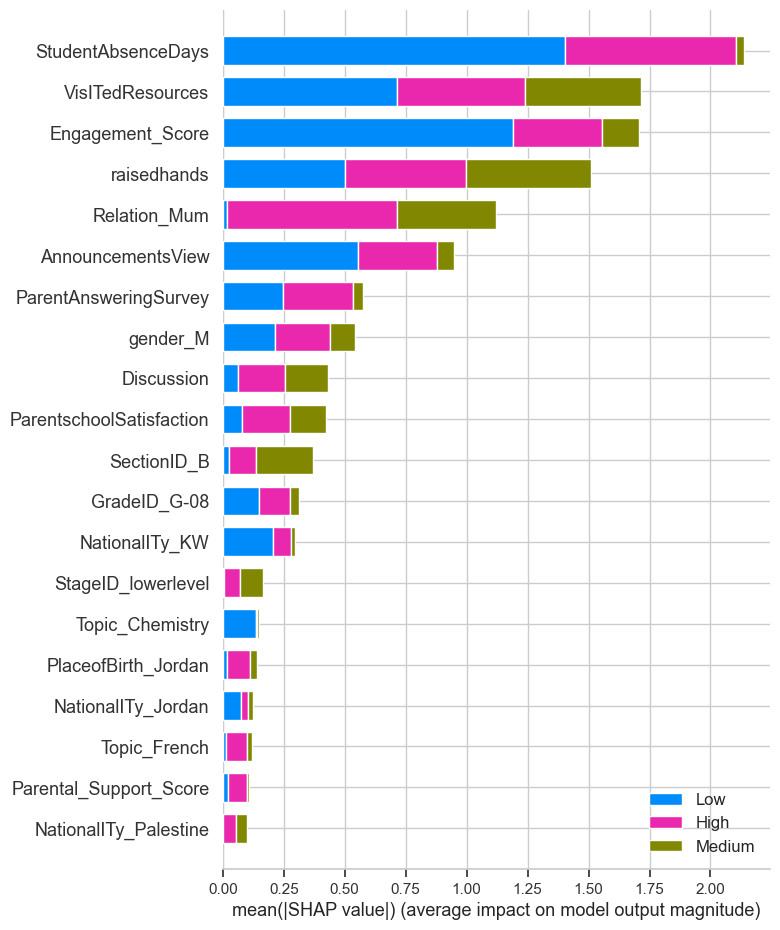

In [38]:
import shap
import numpy as np
import pandas as pd

# ---- 1. Predict classes safely ----
pred_class_numeric = np.argmax(xgb_model.predict_proba(X), axis=1)
pred_class_labels = pd.Series(pred_class_numeric).map({0:'Low', 1:'Medium', 2:'High'})
risk_mapping = {'Low':'At-Risk', 'Medium':'Moderate-Risk', 'High':'Safe'}
risk_categories_X = pred_class_labels.map(risk_mapping)

# ---- 2. SHAP explainer ----
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# ---- 2a. Transpose if needed ----
if isinstance(shap_values, list):
    for i in range(len(shap_values)):
        if shap_values[i].shape[0] == X.shape[1]:
            shap_values[i] = shap_values[i].T
else:
    if shap_values.shape[1] != X.shape[1]:
        shap_values = np.transpose(shap_values, (0,2,1))

# ---- 3. Loop through risk categories ----
for risk in risk_categories_X.unique():
    print(f"\n--- SHAP Summary for {risk} Students ---")
    
    idx = np.where(risk_categories_X.values == risk)[0]
    if len(idx) == 0:
        print(f"No students in this category.")
        continue
    
    X_subset = X.iloc[idx, :]
    
    if isinstance(shap_values, list):
        shap_values_subset = [shap_values[class_idx][idx, :] for class_idx in range(len(shap_values))]
    else:
        shap_values_subset = shap_values[idx]
    
    # ---- Summary plot ----
    shap.summary_plot(shap_values_subset, X_subset, class_names=['Low','Medium','High'], show=True)
    
    # ---- Feature importance bar plot ----
    shap.summary_plot(shap_values_subset, X_subset, plot_type="bar", class_names=['Low','Medium','High'], show=True)


In [39]:
# Combine predictions with original dataset
df_predictions = X.copy()
df_predictions['Predicted_Class'] = pred_class_labels.values
df_predictions['Risk_Category'] = risk_categories_X.values

# Quick overview
df_predictions[['Predicted_Class', 'Risk_Category']].value_counts()


Predicted_Class  Risk_Category
High             Safe             265
Medium           Moderate-Risk    215
Name: count, dtype: int64

In [40]:
risk_summary = df_predictions['Risk_Category'].value_counts().rename_axis('Risk_Category').reset_index(name='Num_Students')
print(risk_summary)


   Risk_Category  Num_Students
0           Safe           265
1  Moderate-Risk           215


In [41]:
engagement_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Mean engagement per risk category
segment_stats = df_predictions.groupby('Risk_Category')[engagement_cols].mean()
print(segment_stats)


               raisedhands  VisITedResources  AnnouncementsView  Discussion
Risk_Category                                                              
Moderate-Risk    29.930233         35.865116          26.962791   37.841860
Safe             60.441509         70.158491          46.807547   47.698113


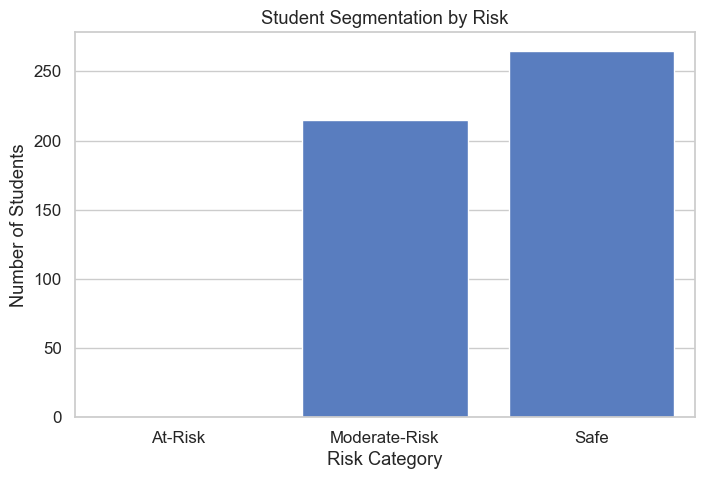

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df_predictions, x='Risk_Category', order=['At-Risk','Moderate-Risk','Safe'])
plt.title('Student Segmentation by Risk')
plt.xlabel('Risk Category')
plt.ylabel('Number of Students')
plt.show()


In [43]:
# Copy predictions
interventions = df_predictions.copy()

# Define engagement thresholds
engagement_thresholds = {
    'raisedhands': 30,
    'VisITedResources': 30,
    'AnnouncementsView': 20,
    'Discussion': 20
}

# Function to flag low engagement
def flag_low_engagement(row):
    low_engagement_metrics = [row[col] < thresh for col, thresh in engagement_thresholds.items()]
    return sum(low_engagement_metrics) >= 2  # At least 2 metrics below threshold

# Apply
interventions['Needs_Intervention'] = interventions.apply(
    lambda x: True if x['Risk_Category'] == 'At-Risk' or flag_low_engagement(x) else False,
    axis=1
)

# Preview
interventions[['Predicted_Class','Risk_Category','Needs_Intervention']].head(10)


Predicted_Class  Risk_Category  Needs_Intervention
0          Medium  Moderate-Risk                True
1          Medium  Moderate-Risk                True
2          Medium  Moderate-Risk                True
3          Medium  Moderate-Risk                True
4          Medium  Moderate-Risk               False
5          Medium  Moderate-Risk               False
6          Medium  Moderate-Risk                True
7            High           Safe                True
8            High           Safe                True
9            High           Safe               False

In [44]:
# Compute a simple Engagement Score
interventions['Engagement_Score'] = interventions[engagement_cols].sum(axis=1)

# Prioritize: lowest engagement first
priority_list = interventions[interventions['Needs_Intervention']].sort_values('Engagement_Score')
priority_list[['Predicted_Class','Risk_Category','Engagement_Score']].head(10)


Predicted_Class  Risk_Category  Engagement_Score
38           Medium  Moderate-Risk                 4
64           Medium  Moderate-Risk                14
85           Medium  Moderate-Risk                14
389          Medium  Moderate-Risk                14
132          Medium  Moderate-Risk                16
12           Medium  Moderate-Risk                17
104          Medium  Moderate-Risk                18
57           Medium  Moderate-Risk                18
102          Medium  Moderate-Risk                18
227            High           Safe                20

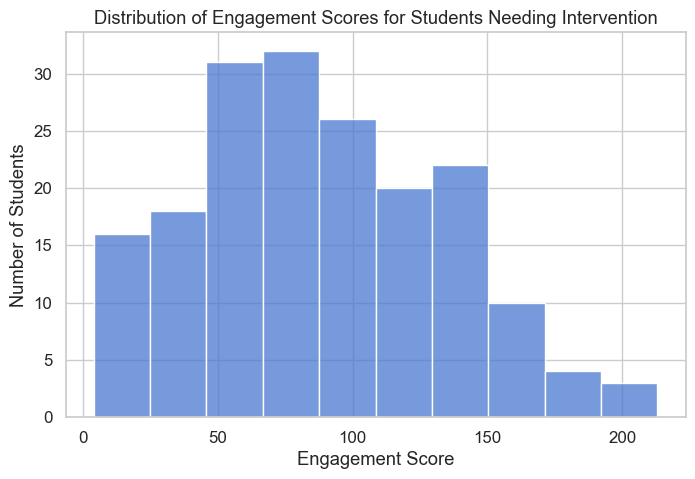

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(priority_list['Engagement_Score'], bins=10, kde=False)
plt.title('Distribution of Engagement Scores for Students Needing Intervention')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Students')
plt.show()


In [46]:
#  Actionable Intervention Report

import pandas as pd

# Copy predictions dataframe
intervention_report = df_predictions.copy()

# Define engagement thresholds
engagement_thresholds = {
    'raisedhands': 30,
    'VisITedResources': 30,
    'AnnouncementsView': 20,
    'Discussion': 20
}

# Function to flag low engagement
def flag_low_engagement(row):
    low_engagement_metrics = [row[col] < thresh for col, thresh in engagement_thresholds.items()]
    return sum(low_engagement_metrics) >= 2  # At least 2 metrics below threshold

# Flag students needing intervention
intervention_report['Needs_Intervention'] = intervention_report.apply(
    lambda x: True if x['Risk_Category'] == 'At-Risk' or flag_low_engagement(x) else False,
    axis=1
)

# Compute Engagement Score
engagement_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
intervention_report['Engagement_Score'] = intervention_report[engagement_cols].sum(axis=1)

# Assign Intervention Priority (lower engagement = higher priority)
intervention_report['Intervention_Priority'] = intervention_report['Engagement_Score'].rank(method='min')

# Sort by priority
intervention_report_sorted = intervention_report.sort_values(['Needs_Intervention', 'Intervention_Priority'], ascending=[False, True])

# Display top 10 students needing intervention
display(intervention_report_sorted[['Predicted_Class', 'Risk_Category', 'Engagement_Score', 'Needs_Intervention', 'Intervention_Priority']].head(10))

# Optional: Export full report to CSV
intervention_report_sorted.to_csv('Student_Intervention_Report.csv', index=False)
print(" Actionable intervention report generated and saved as 'Student_Intervention_Report.csv'")


Predicted_Class  Risk_Category  Engagement_Score  Needs_Intervention  \
38           Medium  Moderate-Risk                 4                True   
64           Medium  Moderate-Risk                14                True   
85           Medium  Moderate-Risk                14                True   
389          Medium  Moderate-Risk                14                True   
132          Medium  Moderate-Risk                16                True   
12           Medium  Moderate-Risk                17                True   
57           Medium  Moderate-Risk                18                True   
102          Medium  Moderate-Risk                18                True   
104          Medium  Moderate-Risk                18                True   
227            High           Safe                20                True   

     Intervention_Priority  
38                     1.0  
64                     2.0  
85                     2.0  
389                    2.0  
132                    5.0  
12                     6.0  
57                     7.0  
102                    7.0  
104                    7.0  
227                   10.0

✅ Actionable intervention report generated and saved as 'Student_Intervention_Report.csv'


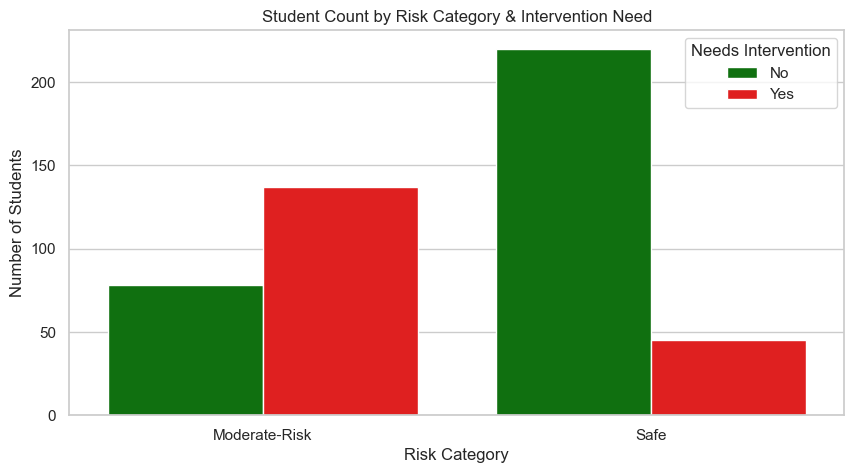

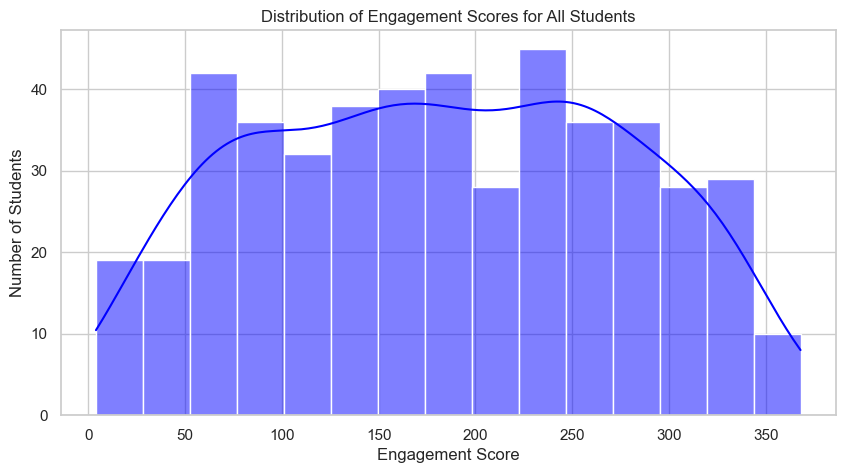

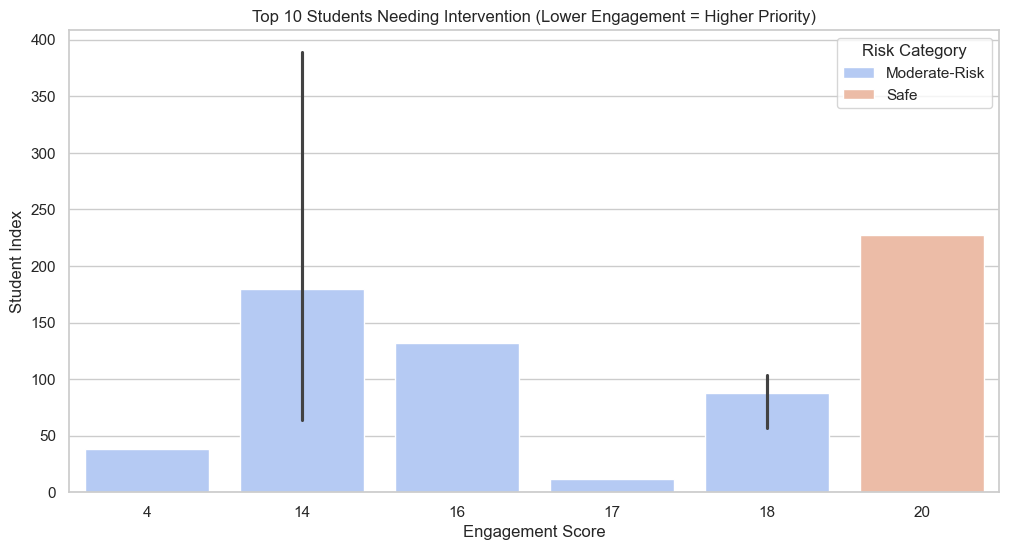

In [47]:
#  Student Intervention Dashboard

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# ---- 1. Count of students per risk category ----
plt.figure(figsize=(10,5))
sns.countplot(data=intervention_report_sorted, x='Risk_Category', hue='Needs_Intervention', palette=['green','red'])
plt.title("Student Count by Risk Category & Intervention Need")
plt.xlabel("Risk Category")
plt.ylabel("Number of Students")
plt.legend(title='Needs Intervention', labels=['No', 'Yes'])
plt.show()

# ---- 2. Distribution of Engagement Scores ----
plt.figure(figsize=(10,5))
sns.histplot(intervention_report_sorted['Engagement_Score'], bins=15, kde=True, color='blue')
plt.title("Distribution of Engagement Scores for All Students")
plt.xlabel("Engagement Score")
plt.ylabel("Number of Students")
plt.show()

# ---- 3. Top 10 Students Needing Intervention ----
top_10 = intervention_report_sorted[intervention_report_sorted['Needs_Intervention']].head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Engagement_Score', y=top_10.index, data=top_10, hue='Risk_Category', dodge=False, palette='coolwarm')
plt.title("Top 10 Students Needing Intervention (Lower Engagement = Higher Priority)")
plt.xlabel("Engagement Score")
plt.ylabel("Student Index")
plt.legend(title='Risk Category')
plt.show()


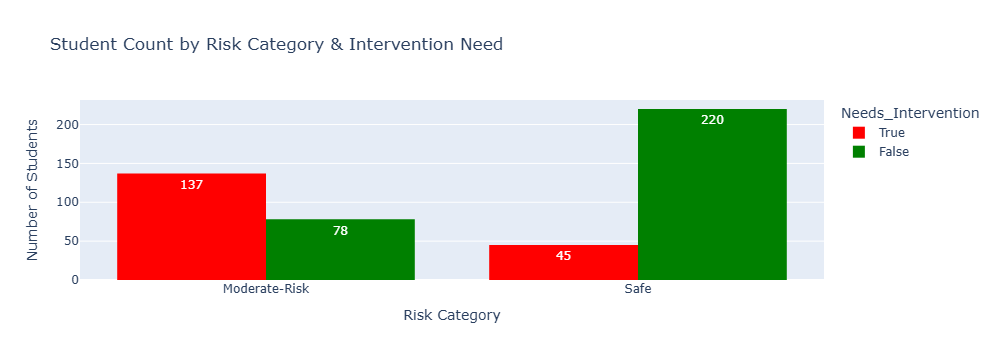

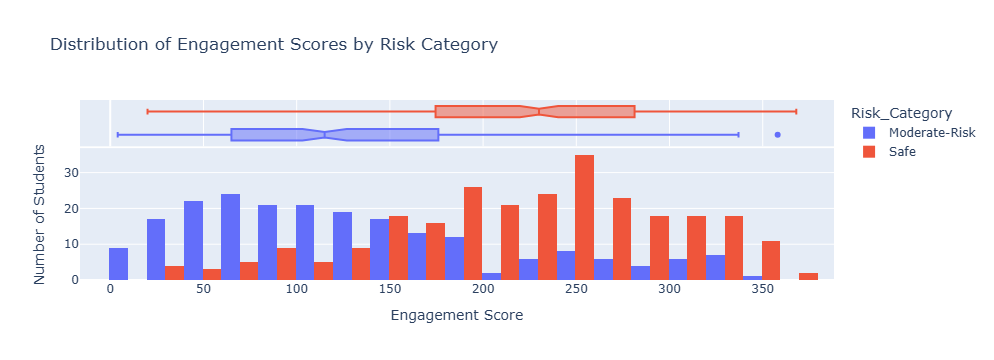

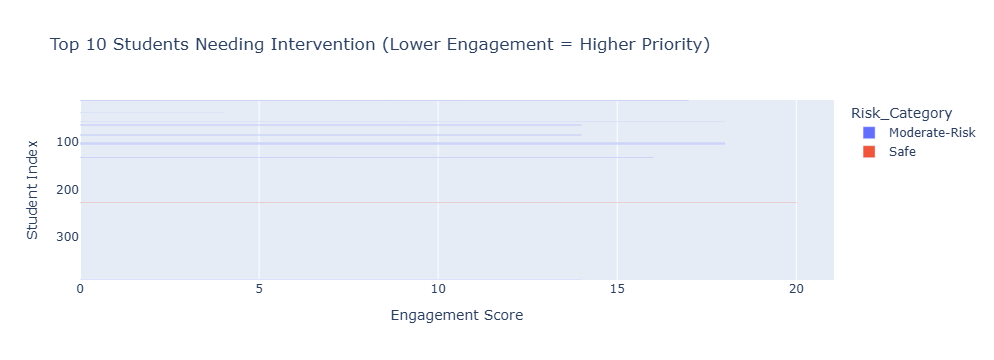

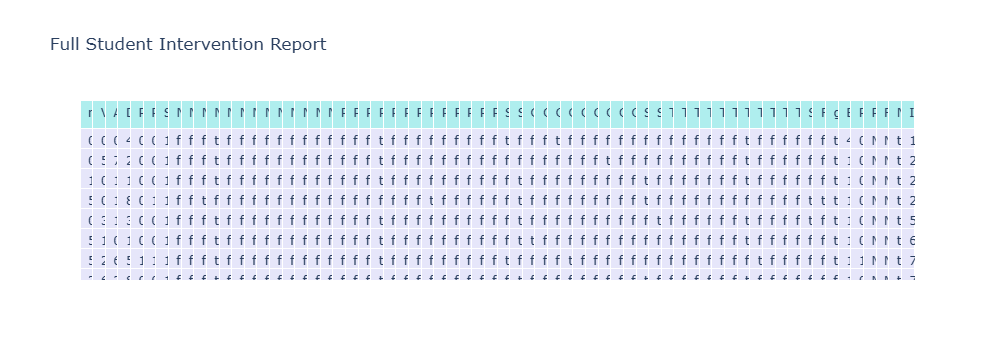

In [48]:
#  Interactive Student Intervention Dashboard (Plotly)

import plotly.express as px

# ---- 1. Count of Students per Risk Category & Intervention ----
fig1 = px.histogram(
    intervention_report_sorted,
    x='Risk_Category',
    color='Needs_Intervention',
    barmode='group',
    text_auto=True,
    color_discrete_map={True: 'red', False: 'green'},
    title="Student Count by Risk Category & Intervention Need"
)
fig1.update_layout(xaxis_title="Risk Category", yaxis_title="Number of Students")
fig1.show()

# ---- 2. Engagement Score Distribution ----
fig2 = px.histogram(
    intervention_report_sorted,
    x='Engagement_Score',
    nbins=20,
    marginal="box",  # adds boxplot on top
    color='Risk_Category',
    title="Distribution of Engagement Scores by Risk Category"
)
fig2.update_layout(xaxis_title="Engagement Score", yaxis_title="Number of Students")
fig2.show()

# ---- 3. Top Priority Students for Intervention ----
top_10 = intervention_report_sorted[intervention_report_sorted['Needs_Intervention']].head(10)
fig3 = px.bar(
    top_10,
    x='Engagement_Score',
    y=top_10.index,
    orientation='h',
    color='Risk_Category',
    text='Engagement_Score',
    title="Top 10 Students Needing Intervention (Lower Engagement = Higher Priority)"
)
fig3.update_layout(yaxis_title="Student Index", xaxis_title="Engagement Score", yaxis_autorange='reversed')
fig3.show()

# ---- 4. Optional: Detailed Interactive Table ----
import plotly.graph_objects as go

fig_table = go.Figure(data=[go.Table(
    header=dict(values=list(intervention_report_sorted.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[intervention_report_sorted[col] for col in intervention_report_sorted.columns],
               fill_color='lavender',
               align='left'))
])
fig_table.update_layout(title="Full Student Intervention Report")
fig_table.show()


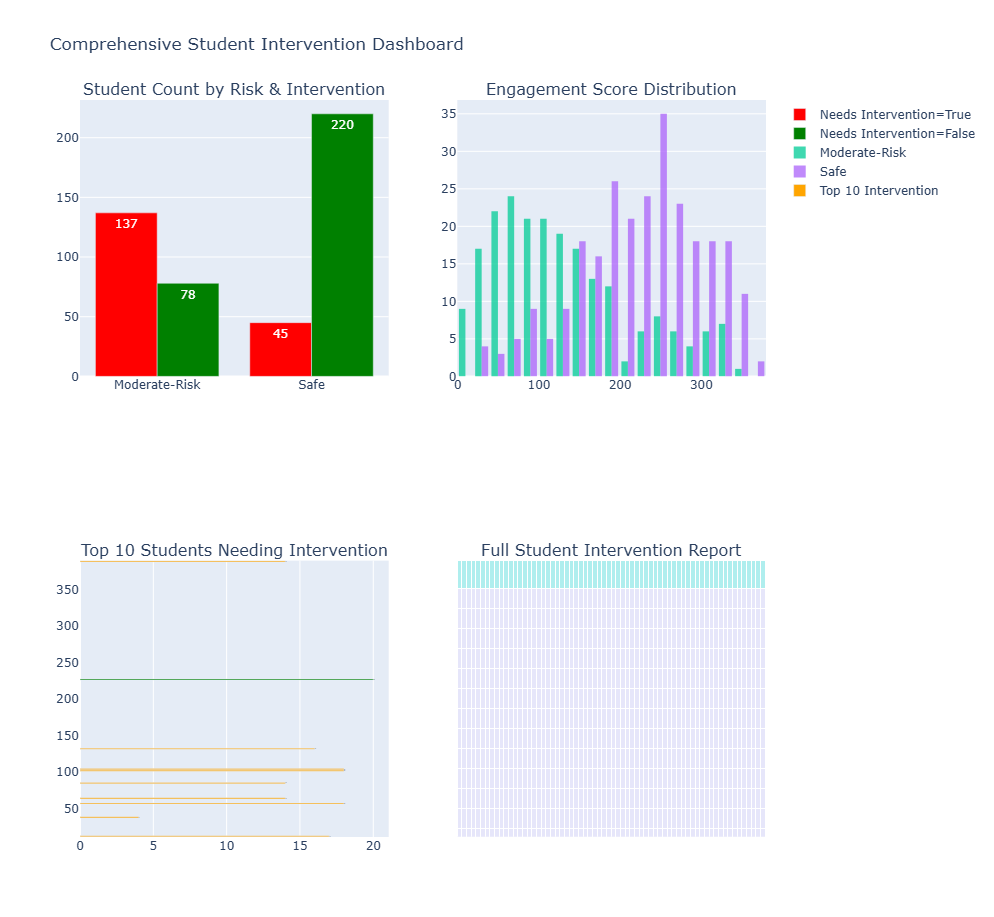

In [49]:
#  Combined Interactive Dashboard (Plotly Subplots)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot layout: 2 rows, 2 columns
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "table"}]],
    subplot_titles=(
        "Student Count by Risk & Intervention",
        "Engagement Score Distribution",
        "Top 10 Students Needing Intervention",
        "Full Student Intervention Report"
    )
)

# ---- 1. Count of Students per Risk Category & Intervention ----
for intervention_status, color in zip([True, False], ['red', 'green']):
    subset = intervention_report_sorted[intervention_report_sorted['Needs_Intervention'] == intervention_status]
    counts = subset['Risk_Category'].value_counts()
    fig.add_trace(
        go.Bar(
            x=counts.index,
            y=counts.values,
            name=f'Needs Intervention={intervention_status}',
            marker_color=color,
            text=counts.values,
            textposition='auto'
        ),
        row=1, col=1
    )

# ---- 2. Engagement Score Distribution ----
for risk in intervention_report_sorted['Risk_Category'].unique():
    subset = intervention_report_sorted[intervention_report_sorted['Risk_Category'] == risk]
    fig.add_trace(
        go.Histogram(
            x=subset['Engagement_Score'],
            name=risk,
            opacity=0.75
        ),
        row=1, col=2
    )

# ---- 3. Top 10 Students Needing Intervention ----
top_10 = intervention_report_sorted[intervention_report_sorted['Needs_Intervention']].head(10)
fig.add_trace(
    go.Bar(
        x=top_10['Engagement_Score'],
        y=top_10.index,
        orientation='h',
        marker_color=top_10['Risk_Category'].map({'At-Risk':'red','Moderate-Risk':'orange','Safe':'green'}),
        text=top_10['Engagement_Score'],
        textposition='auto',
        name='Top 10 Intervention'
    ),
    row=2, col=1
)

# ---- 4. Full Student Intervention Table ----
fig.add_trace(
    go.Table(
        header=dict(values=list(intervention_report_sorted.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[intervention_report_sorted[col] for col in intervention_report_sorted.columns],
                   fill_color='lavender',
                   align='left')
    ),
    row=2, col=2
)

# ---- Layout Adjustments ----
fig.update_layout(
    height=900,
    width=1200,
    title_text="Comprehensive Student Intervention Dashboard",
    barmode='group',
    showlegend=True
)

fig.show()


In [50]:
import pandas as pd
import numpy as np
import random

# 1️ Define columns and categories
num_students = 100

genders = ['M', 'F']
nationalities = ['USA','UK','Nigeria','India','Iran','Iraq','China','Canada','France','Germany','Egypt','Turkey','Spain','Italy']
places_of_birth = nationalities  # same as nationality
stage_ids = ['Stage 1', 'Stage 2', 'Stage 3']
grade_ids = [f'G{i}' for i in range(1,11)]
section_ids = ['A', 'B', 'C']
topics = ['Math','English','Science','Arabic','Quran','Spanish','History','Geography','Biology','Chemistry','Physics','IT']
semesters = ['S', 'F']
relations = ['Father','Mum']
parent_survey = ['Yes','No']
parent_satisfaction = ['Good','Bad']
absence_days = ['Under-7','Above-7']
classes = ['L','M','H']

# 2️ Generate random data
data = {
    'gender': [random.choice(genders) for _ in range(num_students)],
    'NationalITy': [random.choice(nationalities) for _ in range(num_students)],
    'PlaceofBirth': [random.choice(places_of_birth) for _ in range(num_students)],
    'StageID': [random.choice(stage_ids) for _ in range(num_students)],
    'GradeID': [random.choice(grade_ids) for _ in range(num_students)],
    'SectionID': [random.choice(section_ids) for _ in range(num_students)],
    'Topic': [random.choice(topics) for _ in range(num_students)],
    'Semester': [random.choice(semesters) for _ in range(num_students)],
    'Relation': [random.choice(relations) for _ in range(num_students)],
    'raisedhands': np.random.randint(0,101,num_students),
    'VisITedResources': np.random.randint(0,101,num_students),
    'AnnouncementsView': np.random.randint(0,101,num_students),
    'Discussion': np.random.randint(0,101,num_students),
    'ParentAnsweringSurvey': [random.choice(parent_survey) for _ in range(num_students)],
    'ParentschoolSatisfaction': [random.choice(parent_satisfaction) for _ in range(num_students)],
    'StudentAbsenceDays': [random.choice(absence_days) for _ in range(num_students)],
    'Class': [random.choice(classes) for _ in range(num_students)],
}

# -------------------------------
# 3️ Create DataFrame
# -------------------------------
df_fake = pd.DataFrame(data)

# -------------------------------
# 4️ Save to CSV
# -------------------------------
df_fake.to_csv('fake_student_performance.csv', index=False)

print(" 100 fake student records generated and saved to 'fake_student_performance.csv'")
print(df_fake.head())


✅ 100 fake student records generated and saved to 'fake_student_performance.csv'
  gender NationalITy PlaceofBirth  StageID GradeID SectionID    Topic  \
0      M        Iraq       Canada  Stage 1      G8         A  History   
1      M        Iran      Germany  Stage 2      G6         C  Spanish   
2      M        Iraq           UK  Stage 3      G8         B   Arabic   
3      F       India      Nigeria  Stage 2      G6         C   Arabic   
4      M          UK      Germany  Stage 1      G6         B  History   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        S   Father           83                84                  7   
1        F   Father            7                17                 59   
2        F      Mum           72                86                 35   
3        F      Mum            1                72                 62   
4        S      Mum           60                98                 50   

   Discussion ParentAnsweringSurvey Paren

In [52]:
import joblib
joblib.dump(xgb_model, "xgb_student_model.pkl")


['xgb_student_model.pkl']

In [54]:
import joblib
import pandas as pd

# 1️ Load your XGBoost model
xgb_model = joblib.load("xgb_student_model.pkl")

# 2️ Get feature names from the model
try:
    feature_names = xgb_model.get_booster().feature_names
except AttributeError:
    # fallback if using sklearn wrapper
    feature_names = xgb_model.get_booster().feature_names

print("Feature names used during training:", feature_names)


Feature names used during training: ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool', 'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C', 'Topic_Biolog

# 🎓 Student Performance Prediction & Insights System
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## 1️⃣ Project Overview
This project aims to **predict student performance** and provide **actionable insights** for educational institutions using a machine learning approach. The system segments students into risk categories and explains predictions using SHAP for interpretability.

---

## 2️⃣ Dataset
- Synthetic or real student performance dataset containing features such as:
  - **Engagement metrics:** `raisedhands`, `VisITedResources`, `AnnouncementsView`, `Discussion`
  - **Parental support:** `ParentAnsweringSurvey`, `ParentschoolSatisfaction`
  - **Student demographics:** `gender`, `NationalITy`, `PlaceofBirth`, `GradeID`, `StageID`
  - **Other features:** `StudentAbsenceDays`, `Topic`, `Semester`, `SectionID`
- Total samples used for testing: **100 students** (for demonstration)
- Dataset is preprocessed with **one-hot encoding** for categorical variables and alignment with model features.

---

## 3️⃣ Methodology

### Step 1: Data Preprocessing
- Handle missing values.
- One-hot encode categorical variables.
- Align feature names with the **trained XGBoost model**.

### Step 2: Model Training
- **Baseline Models**: Decision Tree, Random Forest, Logistic Regression
  - Random Forest achieved **83% accuracy**.
- **Advanced Model**: XGBoost (multiclass classification)
  - Accuracy: **81.25%**
  - Provides probabilistic predictions for each performance class: Low, Medium, High.

### Step 3: Prediction & Risk Segmentation
- Predicted classes mapped to risk categories:
  - **Low → At-Risk**
  - **Medium → Moderate-Risk**
  - **High → Safe**
- Students segmented accordingly.

### Step 4: Model Explainability
- **SHAP (SHapley Additive exPlanations)** used to interpret predictions.
- Visualizations include:
  - **Summary plot:** Feature impact across all students
  - **Feature importance (bar plot):** Most influential features on predictions
- SHAP provides actionable insights for each risk group.

### Step 5: Deployment
- Implemented as a **Streamlit dashboard**.
- Features:
  - CSV upload for student datasets
  - Prediction display
  - Risk segmentation visualization
  - SHAP summary and feature importance plots

---

## 4️⃣ Results & Insights
- **Risk segmentation:** Quick visualization of the proportion of At-Risk, Moderate-Risk, and Safe students.
- **SHAP analysis:** Highlights key features driving student performance:
  - Engagement scores, parental support, attendance, and topic participation are highly influential.
- **Actionable insights:** Educators can focus interventions on At-Risk students based on feature contributions.

---

## 5️⃣ Future Improvements
- Add **per-student SHAP force plots** for interactive analysis.
- Expand dataset with more demographic and behavioral features.
- Integrate real-time data collection from learning management systems.

---

## 6️⃣ References
- [XGBoost Documentation](https://xgboost.readthedocs.io/)
- [SHAP Documentation](https://shap.readthedocs.io/)
- [Streamlit Documentation](https://docs.streamlit.io/)
